In [7]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 
# Connect to SQL Server ---
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=.;'
    'DATABASE=AdventureWorks2019;'
    'Trusted_Connection=yes;'
)

#  Call the stored procedure ---
df = pd.read_sql_query("EXEC usp_BonusDetails", conn)

#  Inspect DataFrame ---
print(df.head())

C:\Users\mayan\AppData\Local\Temp\ipykernel_35060\2894769078.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("EXEC usp_BonusDetails", conn)


   AnnualLeaveTaken   Bonus  commissionPct    SalesYTD  SalesQuota
0                14     0.0          0.000   559697.56         NaN
1                38  4100.0          0.012  3763178.18    300000.0
2                27  2000.0          0.015  4251368.55    250000.0
3                24  2500.0          0.015  3189418.37    250000.0
4                33   500.0          0.010  1453719.47    250000.0


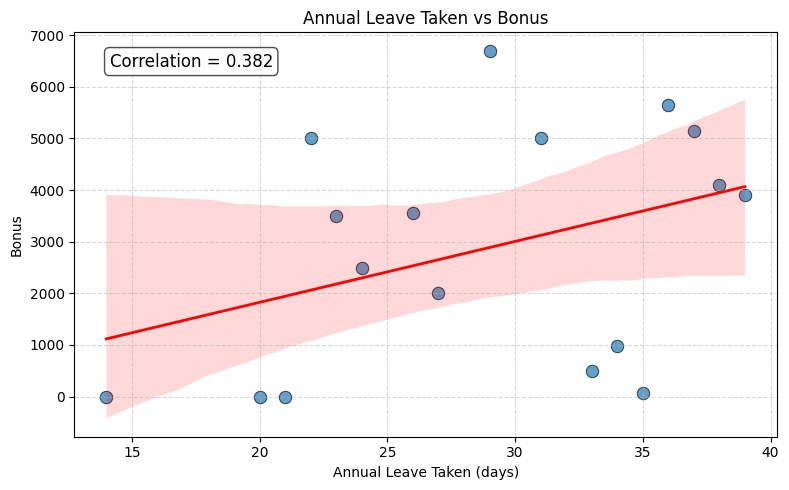

In [ ]:
# Correlation
corr = df['AnnualLeaveTaken'].corr(df['Bonus'])

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='AnnualLeaveTaken', y='Bonus', s=80, alpha=0.7, edgecolor='black')
sns.regplot(data=df, x='AnnualLeaveTaken', y='Bonus', scatter=False, color='red', line_kws={'linewidth': 2})

# Annotate
plt.text(0.05, 0.95, f"Correlation = {corr:.3f}", transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))

plt.title("Annual Leave Taken vs Bonus")
plt.xlabel("Annual Leave Taken (days)")
plt.ylabel("Bonus")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\mayan\AppData\Local\Temp\ipykernel_35060\3767288871.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")


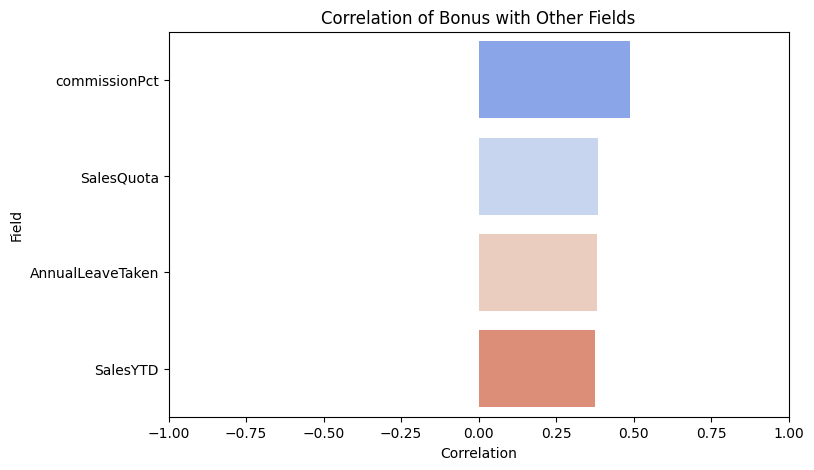

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations with Bonus
corr = df.corr(numeric_only=True)["Bonus"].sort_values(ascending=False)

# Remove Bonus itself from the list
corr = corr.drop("Bonus")

plt.figure(figsize=(8,5))
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("Correlation of Bonus with Other Fields")
plt.xlabel("Correlation")
plt.ylabel("Field")
plt.xlim(-1, 1)
plt.show()